# Analysis framework for 13 MILLION NEW YORK TIMES ARTICLE TITLES!
## _from 1882-2016_

### First, load the three csv files

In [9]:
import csv, nltk
import pandas as pd
import numpy as np
from decimal import Decimal
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, NumeralTickFormatter
output_notebook()

Loading BokehJS ...

In [10]:
csv_1 = '/shared/code/csce489-ds/project/work/nyt_data_1_clean.csv'
%time nyt_1 = pd.read_csv(csv_1, \
                             skipinitialspace=True, \
                             skiprows = True, \
                             index_col=[1], \
                             names=['headlines'],\
                             parse_dates=True).dropna()

CPU times: user 8.77 s, sys: 300 ms, total: 9.07 s
Wall time: 9.07 s


In [11]:
csv_2 = '/shared/code/csce489-ds/project/work/nyt_data_2_clean.csv'
%time nyt_2 = pd.read_csv(csv_2, \
                             skipinitialspace=True, \
                             skiprows = True, \
                             index_col=[0], \
                             names=['headlines'],\
                             parse_dates=True).dropna()

CPU times: user 10.9 s, sys: 400 ms, total: 11.3 s
Wall time: 11.3 s


In [12]:
csv_3 = '/shared/code/csce489-ds/project/work/nyt_data_3_clean.csv'
%time nyt_3 = pd.read_csv(csv_3, \
                             skipinitialspace=True, \
                             skiprows = True, \
                             index_col=[0], \
                             names=['headlines'],\
                             parse_dates=True).dropna()

CPU times: user 644 ms, sys: 20 ms, total: 664 ms
Wall time: 660 ms


### Now sort the indexes in the DF:

In [13]:
nyt_1.sort_index()
nyt_2.sort_index()
nyt_3.sort_index()
print 

### Now append the DataFrames together:

In [14]:
nyt_df = nyt_1.append(nyt_2)
nyt_df = nyt_df.append(nyt_3)

### Check that they appended correctly:

In [15]:
nyt_df.sort_index()
nyt_df.reindex()

print nyt_df.index.min()
print nyt_df.index.max()
print "length: ", len(nyt_df)

1882-01-01 00:00:00
2016-12-05 00:00:00
length:  13431574


### Now we can do cool things like search by Datetimeindex!!

In [10]:
# Search for the first 5 from 1903
nyt_df['1903'].head()

,headlines
1903-01-01,WISH TO THREATEN CHINA.; Ministers Propose to ...
1903-01-01,TO MAKE TRANSIT PLANS REGARDLESS OF EXPENSE; C...
1903-01-01,CLERMONT SKATING RACES; Two Hotly Contested Ev...
1903-01-01,IN HONOR OF MASCAGNI.; Arrangements in Chicago...
1903-01-01,THE UNITED SERVICE.; Army.


In [11]:
# Search for the first 5 from March 1945 
nyt_df['1945-03'].head()

,headlines
1945-03-02,Americans See Germans Kill U.S. Colonel As He ...
1945-03-02,WRECK OF THE 'SPIRIT OF ST. LOUIS' IN OHIO
1945-03-02,MEXICO AND SAN FRANCISCO
1945-03-02,March Arrives Like Lamb Bringing a High of 50
1945-03-02,TANKS ENTER TRIER AFTER TRICKING FOE; AS THE A...


In [12]:
# Search for the first 10 from the day after JFK was assasinated on November 22, 1963
nyt_df['1963-11-23'].head()

,headlines
1963-11-23,People Across U.S. Voice Grief and Revulsion M...
1963-11-23,LEFTIST ACCUSED
1963-11-23,Gov. Connally Shot; Mrs. Kennedy Safe Riding B...
1963-11-23,Why America Weeps
1963-11-23,Tributes Cite Loss to U. S. and World


## Let's Start Analysis!!:

In [18]:
# Function to count how many times an instance occurs per year
def count_occurences(df, dictionary):
    for entry in df.index:
        try:
            dictionary[int(entry.year)] = dictionary[int(entry.year)] + 1
        except ValueError:
            continue    # bad value, skip
    return dictionary

## QUESTION: How many times does the new york times mention itself in its headlines?

In [20]:
# Get the number of times NYT or New York Times is mentioned
not_contains = lambda S: 'to the new york times' not in S.lower()
nyt_mentioned = nyt_df[(nyt_df.headlines.apply(not_contains)) & ((nyt_df.headlines.str.contains('New York Times', case=False)) | (nyt_df.headlines.str.contains('nyt', case=False)))]

nyt_mentioned.head()

,headlines
1960-01-30,ALGIERS CIVILIANS EXPECT 'ANYTHING'; Stock Up ...
1960-02-07,SYMINGTON ASKS ACTION; Sees No Reason for U.S....
1960-02-13,Richard Ampeir 44 Press Aide Of Governor Rocke...
1960-02-14,A BOY'S WORLD THAT IS ANYTHING BUT 'COOL'
1960-02-24,LOUGHRAN DENIAL IS HEARD BY JURY; On Witness S...


In [21]:
# Generate a dictionary to hold the occurences per year and then load
yrs_nyt_mentioned = {key:0 for key in range(1882, 2017)}
for entry in nyt_mentioned.index:
    try:
        yrs_nyt_mentioned[int(entry.year)] = yrs_nyt_mentioned[int(entry.year)] + 1
    except ValueError:
        continue    # bad value, skip

yrs_nyt_mentioned = count_occurences(nyt_mentioned, yrs_nyt_mentioned)

In [22]:
# Plot using bokeh
x = list(yrs_nyt_mentioned.keys())
y = list(yrs_nyt_mentioned.values())


p = figure(plot_width=900, plot_height=450)
p.line(x, y, line_width=3)

p.title.text='NYT Mentions itself in Article Title'
p.title.text_font='helvetica'

p.xgrid.grid_line_color = None
p.ygrid.grid_line_alpha = 0.9
p.ygrid.grid_line_dash = [6, 4]

p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Number"

show(p)

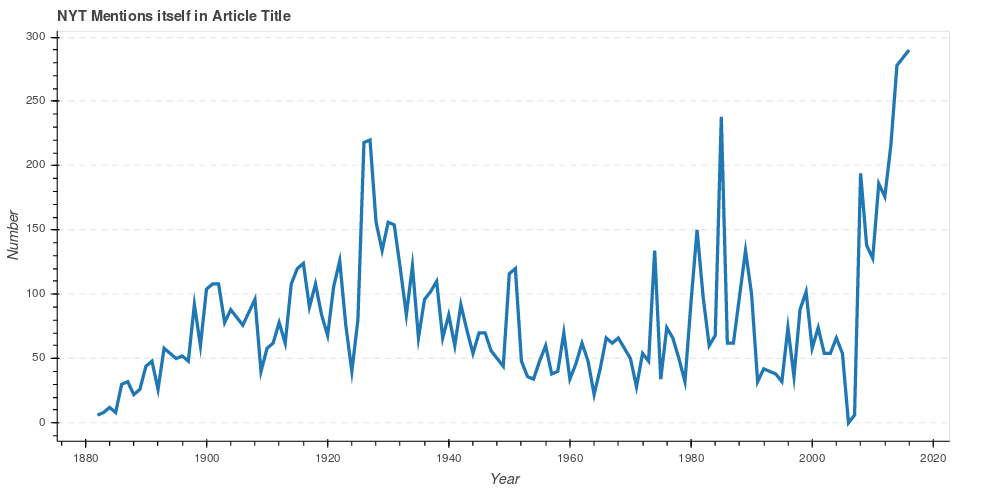

In [7]:
from IPython.display import Image
Image("./images/nyt-mentions-itself.png")

In [16]:
# get all-caps headlines:
contains_caps = lambda r: np.any([w.isupper() for w in r.split(' ')])
selected_rows = nyt_df.loc[nyt_df['headlines'].apply(contains_caps)]
# print(selected_rows.shape)
selected_rows.head()

,headlines
1960-01-01,SOVIET EDITOR CITES MARK TWAIN ARTICLE
1960-01-01,PRIEST IS ACCUSED IN FUND SHORTAGE
1960-01-01,BIG GAINS POSTED BY WESTERN UNION
1960-01-01,U.S. STORE TRADE UP 20% LAST WEEK; Sharp Rise ...
1960-01-01,$99306 FINE IS SET FOR EX-LAWMAKER


In [19]:
yrs_all_caps = {key:0 for key in range(1882, 2017)}
yrs_all_caps = count_occurences(selected_rows, yrs_all_caps)

In [21]:
# yrs_all_caps
# Plot using bokeh
x = list(yrs_all_caps.keys())
y = list(yrs_all_caps.values())

p = figure(plot_width=900, plot_height=450)
p.line(x, y, line_width=3)

p.title.text='Number of Articles Containing All-Capital Lettered Words'
p.title.text_font='helvetica'

p.xgrid.grid_line_color = None
p.ygrid.grid_line_alpha = 0.9
p.ygrid.grid_line_dash = [6, 4]

p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Number"
p.yaxis[0].formatter = NumeralTickFormatter(format="0,0")

show(p)

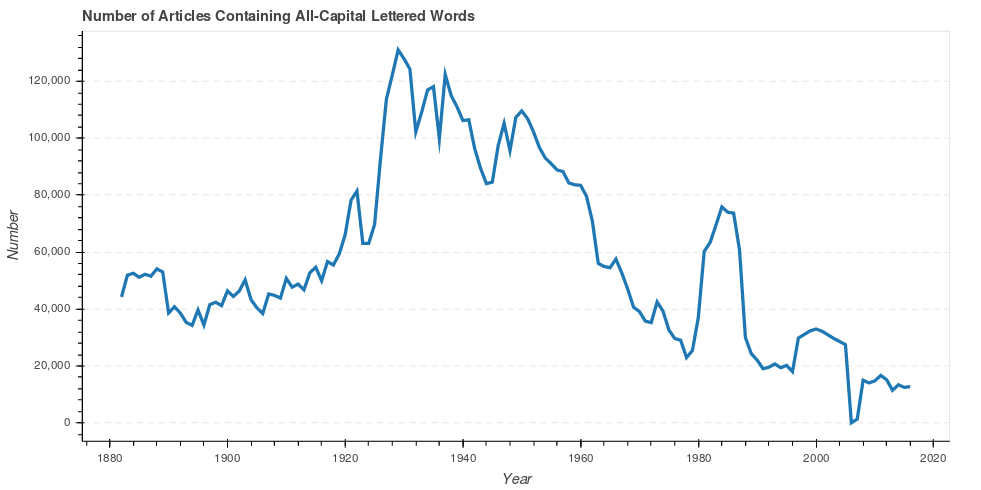

In [8]:
from IPython.display import Image
Image("./images/all-caps-headlines.png")

# Wait, wasn't something happening during this spike?

In [23]:
# yrs_all_caps
# Plot using bokeh
x = list(yrs_all_caps.keys())
y = list(yrs_all_caps.values())

p = figure(plot_width=900, plot_height=450)
p.line(x, y, line_width=3)

p.title.text='Number of Articles Containing All-Capital Lettered Words'
p.title.text_font='helvetica'

p.xgrid.grid_line_color = None
p.ygrid.grid_line_alpha = 0.9
p.ygrid.grid_line_dash = [6, 4]

p.patch([1939, 1939, 1945,1945], [0,130000,130000,0], alpha=0.1, line_width=2)

p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Number"
p.yaxis[0].formatter = NumeralTickFormatter(format="0,0")

show(p)

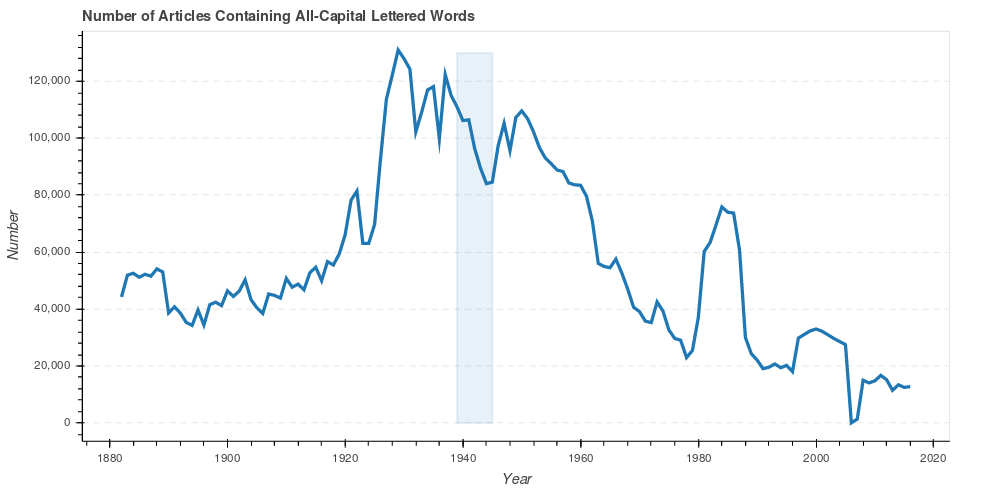

In [24]:
from IPython.display import Image
Image("./images/all-caps-headlines-withWWII-shading.png")

## Looks like a swift rise in capital headlines after World War II...

### Now find what percentage of each year's headlines were all caps!
#### This one takes FOREVER to compute... DON'T RUN THIS, THE DATA WAS WRITTEN TO CSV, NO NEED TO RERUN! DON'T DO IT!

In [95]:
from collections import defaultdict
# Uncomment to re-run, it will take approx 20-30 mins
# # Calculate the percentage of capitol words for each entry
# all_cap_percent = defaultdict(list) 
# # Get each entry with caps
# for index, headline in selected_rows.iterrows():
#     cap_words = 0.0
#     # split the entry by space
#     words = headline[0].split()
#     # iterate through the word list and find 
#     for word in words:
#         if word.isupper():
#             cap_words = cap_words + 1
#     all_cap_percent[index.year].append(cap_words/len(words) * 100)

In [101]:
# # Average the capitol percentage values
# for entry, values in all_cap_percent.iteritems():
#     all_cap_percent[entry] = sum(values)/len(values)
# all_cap_percent.items()

In [103]:
# That took a while, let's write the results to a csv file so we don't have to compute it again
# out_file = '/shared/code/csce489-ds/project/work/percent_capital.csv'
# with open(out_file, 'wb') as f:
#     w = csv.writer(f)
#     w.writerows(all_cap_percent.items())

In [27]:
# Read in the CSV date from previous calculation, Uncomment previous if re-running calc
in_file = '/shared/code/csce489-ds/project/repo-correct/489-project/data/percent_capital.csv'
with open(in_file, 'r') as f:
    read = csv.reader(f)
    perc_cap = {int(rows[0]):float(rows[1]) for rows in read}

In [30]:
x = list(perc_cap.keys())
y = list(perc_cap.values())

p = figure(plot_width=900, plot_height=450)
p.line(x, y, line_width=3)

p.title.text='Percentage of Articles with Entire Title Capitalized'
p.title.text_font='helvetica'

p.xgrid.grid_line_color = None
p.ygrid.grid_line_alpha = 0.9
p.ygrid.grid_line_dash = [6, 4]

# p.patch([1939, 1939, 1945,1945], [0,130000,130000,0], alpha=0.1, line_width=2)

p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Percent"
# p.yaxis[0].formatter = NumeralTickFormatter(format="%")

show(p)

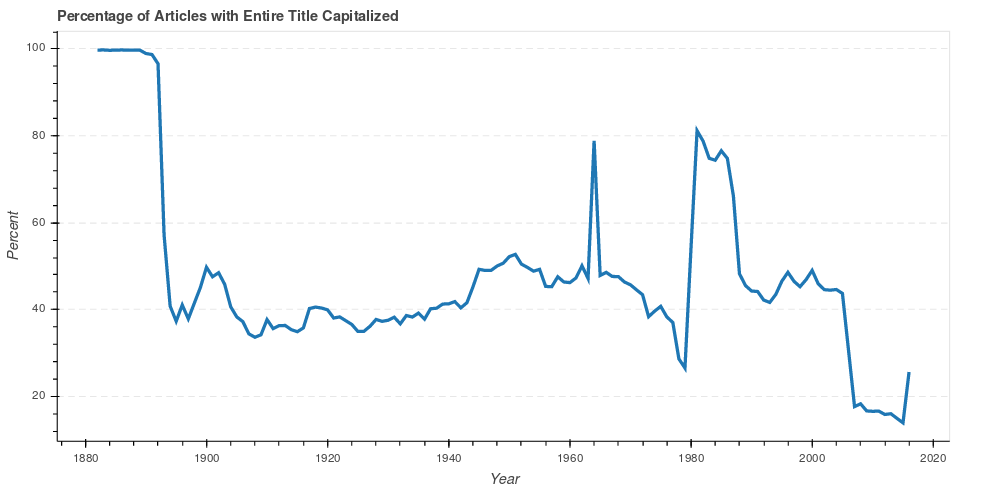

In [29]:
from IPython.display import Image
Image("./images/percent-all-caps.png")

# Calculate Flesch Readability Score


In [77]:
# Flesch Reading ease -- Takes an enormous amount of time to run, uncomment if you dare...

# from collections import defaultdict
# from textstat.textstat import textstat
# count = 0
# dictionary = defaultdict(list)
# for index, headline in nyt_df.iterrows():
#     # print date #this is the title heading of each data point
#     count = count + 1
# #     if count > 1000000: #use this to generate plot for intial 1000 or 5000 data points
# #         break
#     date = index.year
#     try:
#         if len(headline[0]) > 0:
#             dictionary[date].append(textstat.flesch_reading_ease(headline[0])) #appending all redability value for the same exisiting date
#     except:
#         continue

In [73]:
for entry, values in dictionary.iteritems():
    dictionary[entry] = sum(values)/len(values)


In [76]:
# That took a while, let's write the results to a csv file so we don't have to compute it again
# out_file = './data/flesch_score.csv'
# with open(out_file, 'wb') as f:
#     w = csv.writer(f)
#     w.writerows(dictionary.items())

In [12]:
# Read in the CSV date from previous calculation, Uncomment previous if re-running calc
in_file = './data/flesch_score.csv'
with open(in_file, 'r') as f:
    read = csv.reader(f)
    readability_score = {int(rows[0]):float(rows[1]) for rows in read}

In [28]:
# Plot using bokeh
x = list(readability_score.keys())
y = list(readability_score.values())

p = figure(plot_width=900, plot_height=450)
p.line(x, y, line_width=3)

p.title.text='Flesch Reading Ease per Year'
p.title.text_font='helvetica'

p.xgrid.grid_line_color = None
p.ygrid.grid_line_alpha = 0.9
p.ygrid.grid_line_dash = [6, 4]

p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Score"
p.yaxis[0].formatter = NumeralTickFormatter(format="0,0")

show(p)

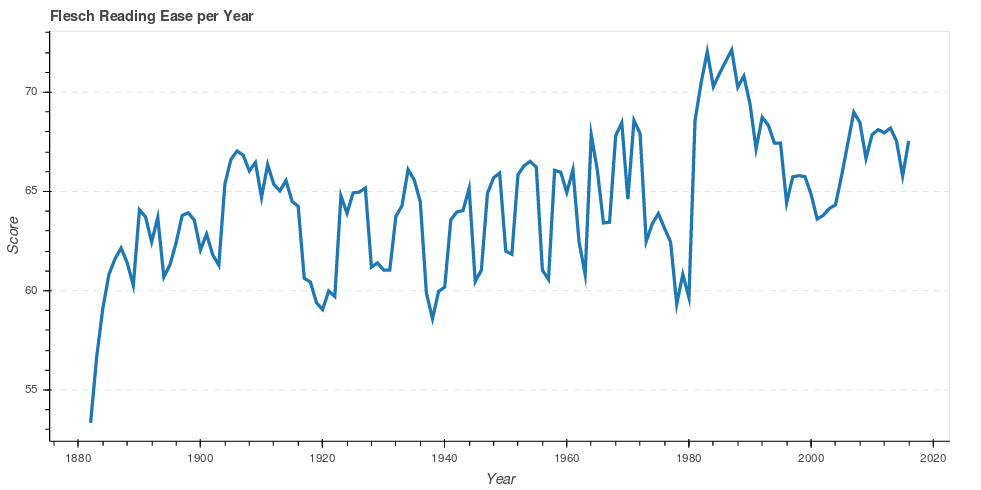

In [26]:
from IPython.display import Image
Image("./images/flesch-reading.png")

# How Have Headlines with ?'s Changed?

In [15]:
# get all headlines containing a question mark:
quest_rows = nyt_df.loc[nyt_df['headlines'].str.contains('\?$')]
print(quest_rows.shape)
quest_rows.head()

(80982, 1)


,headlines
1960-01-03,Teachers Doing Home's Work?
1960-01-04,Return to Reason?
1960-01-08,When Trout Fishermen Start Tying Flies Can Spr...
1960-01-10,The Issues: Peace Prosperity or -- ?; The main...
1960-01-10,ONCE AGAIN GRANDEUR FOR LA PATRIE?; De Gaulle ...


In [16]:
# Extract the values for each year into a dictionary
yrs_quest = {key:0 for key in range(1882, 2017)}
yrs_quest = count_occurences(quest_rows, yrs_quest)

## Now Let's Plot the Number of Headlines with ?'s 

In [18]:
# Plot using bokeh
x = list(yrs_quest.keys())
y = list(yrs_quest.values())

p = figure(plot_width=900, plot_height=450)
p.line(x, y, line_width=3)

p.title.text='Number of Articles Containing Question Marks?'
p.title.text_font='helvetica'

p.xgrid.grid_line_color = None
p.ygrid.grid_line_alpha = 0.9
p.ygrid.grid_line_dash = [6, 4]

p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Number"
p.yaxis[0].formatter = NumeralTickFormatter(format="0,0")

show(p)

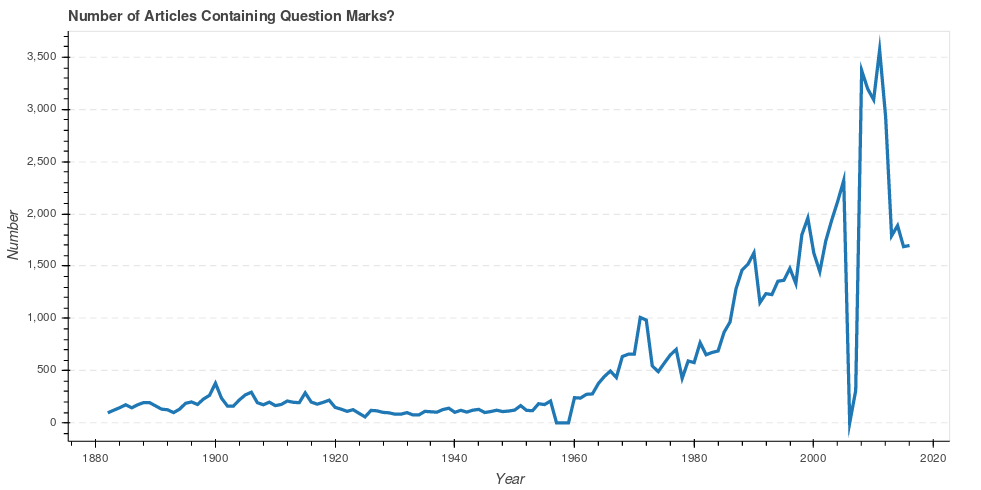

In [31]:
from IPython.display import Image
Image("./images/question-marks.png")

## It appears that there is an upwards trend in the average number of headlines with question marks!